# Mushroom Classification
### Milestone 3
#### Cloe Kwiatkowski

# !['Mushrooms'](mushroomKaggle.jpg)


## Research Question: 
    How can we use machine learning to select the most important features for determining if a mushroom is edible or poisonous? Are there certain features that are considered most important across classification models?

### Project Plan

#### Background:
Fungi are subcatagorized based on their life cycles, the presence and structure of their fruiting body, and the arrangement or and type of spores produced. Mushrooms belong to the kingdom of fungi and the subcategory of macroscopic filamentous fungi, acting as the fruiting body of the fungus and contain the spores. You are a junior mycologist  who has a background in data science and wants to learn how machine learning can be used to help classify harmful, poisonous mushrooms from safe, edible mushrooms. Mushrooms are part of a whole kingdom like the plant and animal kingdoms, yet there is still an unsufficient amount of research on the subject. Your research focuses on what physical characteristics are most important in classifying whether a mushroom is safe or harmful to eat. Using your analytical mindset and programming skills, determine which physical features of mushrooms are most helpful in classification.

#### About the Dataset:
The mushroom dataset contains categorical data consisting of physical characteristics (mushroom cap shape, odor, gill spacing, spore print color, etc.) for the species of gilled mushrooms in the Argaricus and Lepiota Family. Each species is classified as edible or poisonous and is stored in the 'class' column as 'e' or 'p' respectively. There is no simple rule for determining the edibility of mushrooms (like "leaflets of three , let it be" for Poison Ivy), but machine learning algorithms may be able to help determine which features and/or combinations of features can make this classification easier to determine.

#### The Models:
The dataset consists solely of categorical data that will need to be encoded prior to building a model algorithm. The following models are meant for supervised classification. Model algorithm comparison of cross-validation scores can be found in the Model Evaluation section of this Jupyter Notebook.


Access the Dataset:
https://www.kaggle.com/datasets/ulrikthygepedersen/mushroom-attributes

More about fungi:
https://microbiologysociety.org/why-microbiology-matters/what-is-microbiology/fungi.html
https://www.ncbi.nlm.nih.gov/books/NBK8125/

---
### Importing Packages and Libraries

In [44]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing and Reading the Mushroom Dataset

In [45]:
# importing the mushroom.csv file
mushrooms = pd.read_csv('mushroom.csv')
mushrooms # (8124 rows x 23 columns)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',b'e'
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm',b'e'
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g',b'e'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,b'k',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'y',b'e',...,b'o',b'o',b'p',b'o',b'o',b'p',b'b',b'c',b'l',b'e'
8120,b'x',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'y',b'e',...,b'o',b'o',b'p',b'n',b'o',b'p',b'b',b'v',b'l',b'e'
8121,b'f',b's',b'n',b'f',b'n',b'a',b'c',b'b',b'n',b'e',...,b'o',b'o',b'p',b'o',b'o',b'p',b'b',b'c',b'l',b'e'
8122,b'k',b'y',b'n',b'f',b'y',b'f',b'c',b'n',b'b',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'w',b'v',b'l',b'p'


In [46]:
# checking for N/A values
mushrooms.isna().sum()  # no need for SimpleImputer

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

### Encoding Categorical Data

In [47]:
# imports
from sklearn.preprocessing import LabelEncoder

In [48]:
m_columns=["cap-shape", "cap-surface", "cap-color", "bruises%3F", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", 
     "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-above-ring",
     "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type",
     "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat", "class"]

le = LabelEncoder()

for i in m_columns:
    mushrooms[i] = le.fit_transform(mushrooms[i])

mushrooms.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


## Modeling

Splitting the Data: Features of Interest & Target Vector

In [49]:
# features of interest
X = mushrooms.drop(['class'], axis=1)

# target vector
y = mushrooms['class']  # 0 == edible; 1 == poisonous

Splitting the Data: Training, Validation, & Test Sets

In [50]:
# imports
from sklearn.model_selection import train_test_split

In [51]:
# train/test split 1 - training/validation set & test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# train/test split 2 - training set & validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.333, random_state=42)

### Decision Trees
- In a decision tree, each question is called a node and each possible answer is a branch
- In a decision tree algorithm, it finds the feature that provides the largest information gain and splits on that feature; for every branch split, the algorithm finds the next feature that gives the most information gain and splits on that feature; this repeats until it cannot split the branches anymore
- Information gain is defined as the reduction in entropy by transforming a dataset; it is calculated by comparing the entropy of the dataset before and after a transformation
- The criterion is the function to measure the quality of the split and is used to calculate information gain

In [52]:
# imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Decision Tree Based On *Entropy*
Entropy is a measure of information that indicates the level of disorder of the features with the target. Just like with gini, the optimal split is decided by the feature with the less entropy.

In [53]:
# building a decision tree classifier that splits based on gini index
entropy_tree = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='entropy', random_state=42))
])
# fitting model to the training data
entropy_tree.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

### Decision Tree Based On *Gini Index*
Gini index is a way to measure information gain by measuring the frequency at which some part of the dataset will be mislabeled when it is randomly labeled. A gini index of 0 is the minimum value and indicates when the node is "pure", meaning that all elements of that particular node is of uniform class.

In [54]:
# building a decision tree classifier that splits based on gini index
gini_tree = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion='gini', random_state=42))
])
# fitting model to the training data
gini_tree.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree', DecisionTreeClassifier(random_state=42))])

### Calculating Feature Importance

Entropy

<Axes: title={'center': 'Entropy Feature Importance'}, ylabel='Feature Importance'>

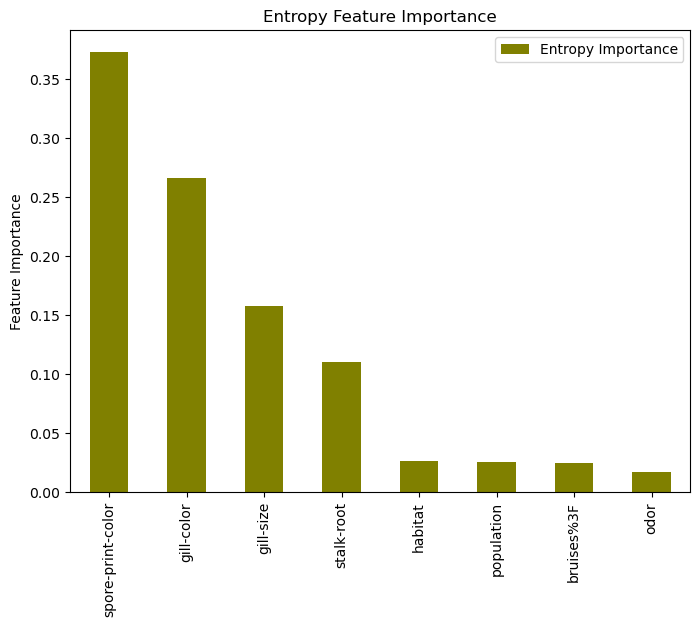

In [55]:
# calculating ENTROPY feature importance
entropy_feature_importance = pd.DataFrame(entropy_tree.named_steps['tree'].feature_importances_, index=X.columns, columns=["Entropy Importance"])

# sorting features by importance in descending order
entropy_feature_importance.sort_values(by='Entropy Importance', ascending=False, inplace=True)

# getting only features where importance > 0
entropy_feat_imp = entropy_feature_importance[(entropy_feature_importance['Entropy Importance']>0.0)]

# plotting feature importance
entropy_feat_imp.plot(kind='bar', figsize=(8,6), color='olive', title='Entropy Feature Importance', ylabel='Feature Importance')

Gini Index

<Axes: title={'center': 'Gini Index Feature Importance'}, ylabel='Feature Importance'>

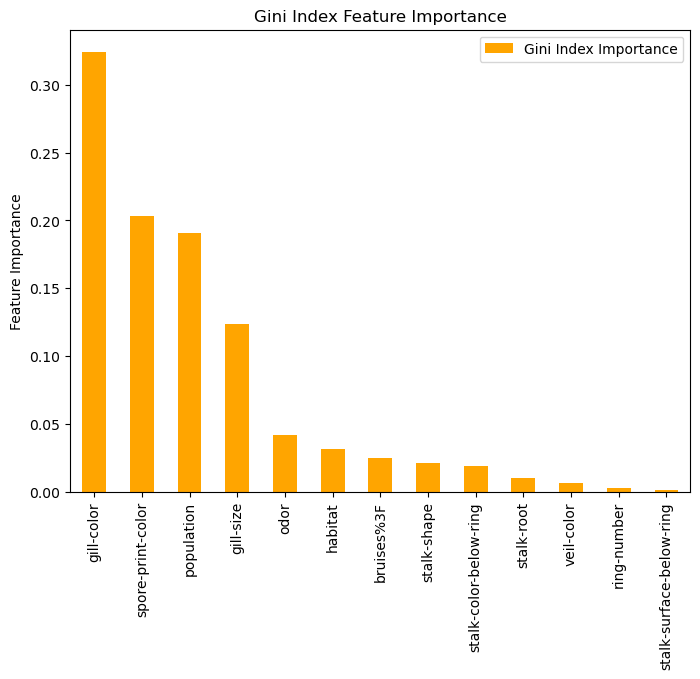

In [56]:
# calculating GINI INDEX feature importance
gini_feature_importance = pd.DataFrame(gini_tree.named_steps['tree'].feature_importances_, index=X.columns, columns=["Gini Index Importance"])

# sorting features by importance in descending order
gini_feature_importance.sort_values(by='Gini Index Importance', ascending=False, inplace=True)

# getting only features where importance > 0
gini_feat_imp = gini_feature_importance[(gini_feature_importance['Gini Index Importance']>0.0)]

# plotting feature importance
gini_feat_imp.plot(kind='bar', figsize=(8,6), color='orange', title='Gini Index Feature Importance', ylabel='Feature Importance')

In [57]:
# joining dfs
EGI_feature_importances = pd.concat([entropy_feature_importance, gini_feature_importance], axis=1)

# resetting index
EGI_feature_importances.reset_index(inplace=True)

# creating new column of feature names
EGI_feat_imp = EGI_feature_importances.rename(columns={'index':'Feature'})

# sorting df first by entropy feature importance and then gini index
EGI_feat_imp = EGI_feature_importances.sort_values(by=['Entropy Importance', 'Gini Index Importance'], ascending=False)

# excluding rows where entropy and gini index feature importance are both 0
EGI_feat_imp = EGI_feat_imp[(EGI_feat_imp['Entropy Importance']>0.0) | (EGI_feat_imp['Gini Index Importance']>0.0)]


EGI_feat_imp

,index,Entropy Importance,Gini Index Importance
0,spore-print-color,0.372704,0.203637
1,gill-color,0.265638,0.324470
2,gill-size,0.157825,0.123433
3,stalk-root,0.110277,0.009709
4,habitat,0.026499,0.031614
5,population,0.025352,0.190700
6,bruises%3F,0.024418,0.024481
7,odor,0.017287,0.041892
17,stalk-shape,0.000000,0.021008
8,stalk-color-below-ring,0.000000,0.018931


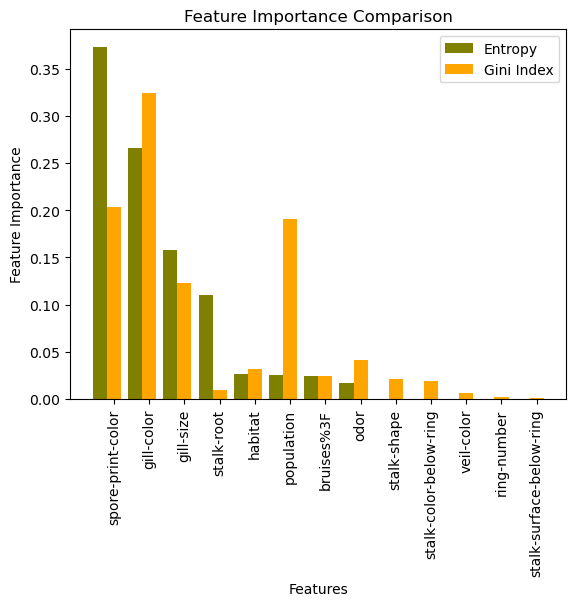

In [58]:
# specifying labels and x axis
features = EGI_feat_imp['index']
X_axis = np.arange(len(features))

# specifying y values for each model
y1 = EGI_feat_imp['Entropy Importance']
y2 = EGI_feat_imp['Gini Index Importance']

# bar width
width = 0.2

# plotting bar graphs
plt.bar(X_axis - width, y1, width=0.4, label='Entropy', color='olive')
plt.bar(X_axis + width, y2, width=0.4, label='Gini Index', color='orange')

plt.xticks(X_axis + width, features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Comparison')
plt.legend()


plt.show()

Random Forest Classifier Feature Importance

In [59]:
# imports
from sklearn.ensemble import RandomForestClassifier

# building a random forest classifier pipeline w/ max_depth=6 & max_features=8
rfc = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', RandomForestClassifier(random_state=42, max_depth=8, max_features=8))  # using the optimal max_features=8
])
# fit the pipeline
rfc.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree',
                 RandomForestClassifier(max_depth=8, max_features=8,
                                        random_state=42))])

<Axes: title={'center': 'RFC Feature Importance'}, ylabel='Feature Importance'>

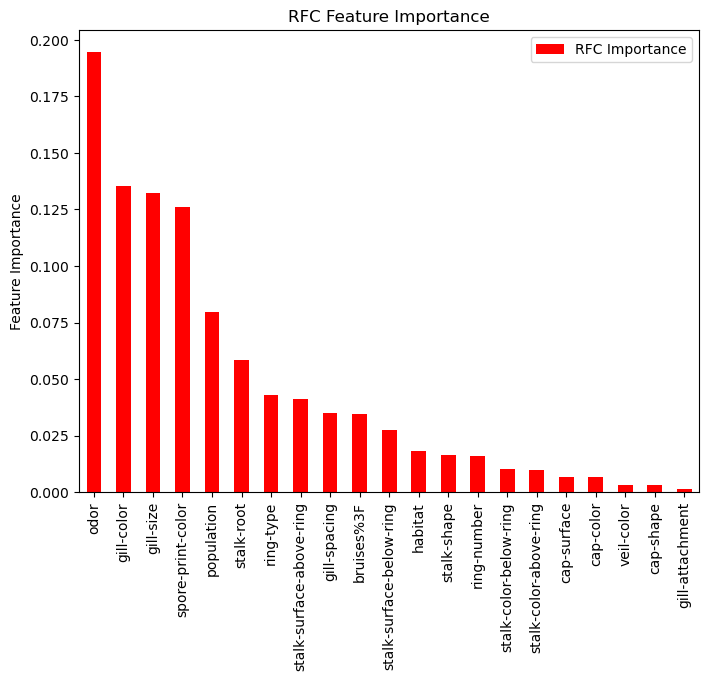

In [60]:
# calculating feature importance
rfc_feature_importance = pd.DataFrame(rfc.named_steps['tree'].feature_importances_, index=X.columns, columns=['RFC Importance'])

# sorting features by importance in descending order
rfc_feature_importance.sort_values(by='RFC Importance', ascending=False, inplace=True)

# excluding rows where feature importance > 0
rfc_feat_imp = rfc_feature_importance[(rfc_feature_importance['RFC Importance']>0.0)]

# plotting
rfc_feat_imp.plot(kind='bar', figsize=(8,6), color='red', title='RFC Feature Importance', ylabel='Feature Importance')

AdaBoost Feature Importance

In [61]:
# imports
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

# building AdaBoost Boosting classifier w/ optimal learning_rate=0.1
AdaBoost = Pipeline([
    ('scaler', StandardScaler()),
    ('ABC', AdaBoostClassifier(random_state=42, learning_rate=0.5))
])
# fit the pipeline
AdaBoost.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ABC',
                 AdaBoostClassifier(learning_rate=0.5, random_state=42))])

<Axes: title={'center': 'AdaBoost Feature Importance'}, ylabel='Feature Importance'>

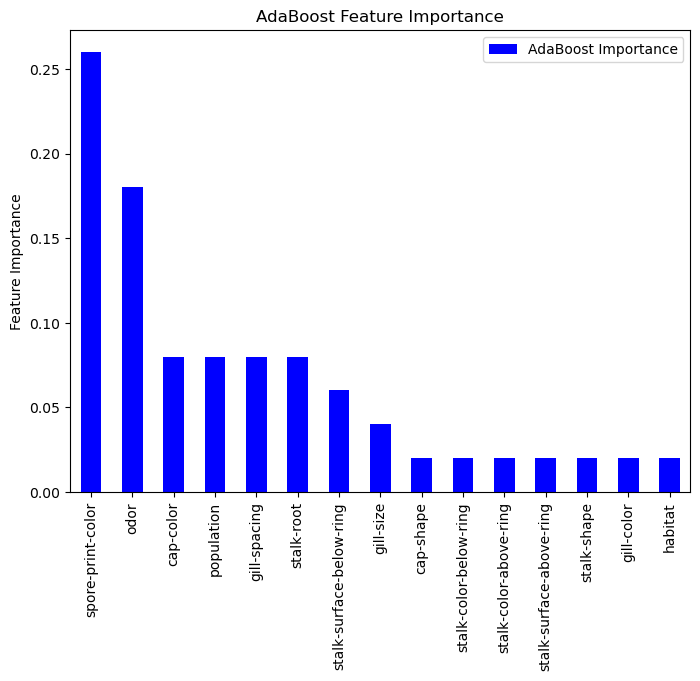

In [62]:
# calculating feature importance
AB_feature_importance = pd.DataFrame(AdaBoost.named_steps['ABC'].feature_importances_, index=X.columns, columns=['AdaBoost Importance'])

# sorting features by importance in descending order
AB_feature_importance.sort_values(by='AdaBoost Importance', ascending=False, inplace=True)

# excluding rows where feature importance > 0
AB_feat_imp = AB_feature_importance[(AB_feature_importance['AdaBoost Importance']>0.0)]

# plotting
AB_feat_imp.plot(kind='bar', figsize=(8,6), color='blue', title='AdaBoost Feature Importance', ylabel='Feature Importance')

GradientBoost Feature Importance

In [63]:
# building pipeline - gradientboost boosting classifier w/ optimal learning_rate=0.1
GradientBoost = Pipeline([
    ('scaler', StandardScaler()),
    ('GB', GradientBoostingClassifier(random_state=42, learning_rate=0.1))
])
# fit the pipeline
GradientBoost.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('GB', GradientBoostingClassifier(random_state=42))])

<Axes: title={'center': 'GradientBoost Feature Importance'}, ylabel='Feature Importance'>

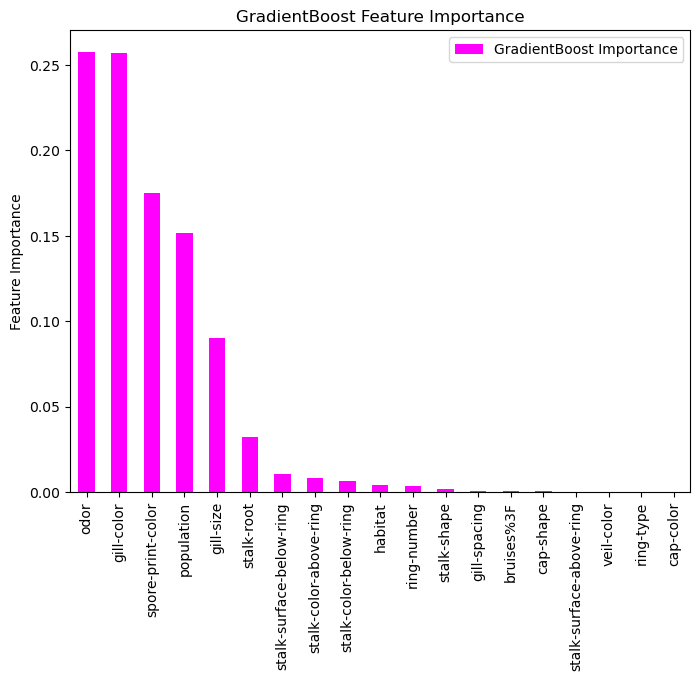

In [64]:
# calculating feature importance
GB_feature_importance = pd.DataFrame(GradientBoost.named_steps['GB'].feature_importances_, index=X.columns, columns=['GradientBoost Importance'])

# sorting features by importance in descending order
GB_feature_importance.sort_values(by='GradientBoost Importance', ascending=False, inplace=True)

# excluding rows where feature importance > 0
GB_feat_imp = GB_feature_importance[(GB_feature_importance['GradientBoost Importance']>0.0)]

# plotting
GB_feat_imp.plot(kind='bar', figsize=(8,6), color='magenta', title='GradientBoost Feature Importance', ylabel='Feature Importance')

Comparison of Models

In [65]:
# joining the dfs
ml_feature_importance = pd.concat([entropy_feature_importance, gini_feature_importance, rfc_feature_importance, AB_feature_importance, GB_feature_importance], axis=1)

# resetting index
ml_feature_importance.reset_index(inplace=True)

# creating new column of feature names
feat_imp = ml_feature_importance.rename(columns={'index':'Feature'})
feat_imp

,Feature,Entropy Importance,Gini Index Importance,RFC Importance,AdaBoost Importance,GradientBoost Importance
0,spore-print-color,0.372704,0.203637,0.126145,0.26,0.174793
1,gill-color,0.265638,0.324470,0.135526,0.02,0.257000
2,gill-size,0.157825,0.123433,0.132421,0.04,0.090351
3,stalk-root,0.110277,0.009709,0.058309,0.08,0.032016
4,habitat,0.026499,0.031614,0.018330,0.02,0.004361
5,population,0.025352,0.190700,0.079552,0.08,0.151541
6,bruises%3F,0.024418,0.024481,0.034551,0.00,0.000422
7,odor,0.017287,0.041892,0.194663,0.18,0.257581
8,stalk-color-below-ring,0.000000,0.018931,0.010201,0.02,0.006447
9,ring-type,0.000000,0.000000,0.043089,0.00,0.000042


Entropy & Gini Index Comparison

In [66]:
# joining dfs
feature_importances = pd.concat([entropy_feature_importance, gini_feature_importance], axis=1)

# resetting index
feature_importances.reset_index(inplace=True)

# creating new column of feature names
feat_imp = feature_importances.rename(columns={'index':'Feature'})

# sorting df first by entropy feature importance and then gini index
feat_imp = feat_imp.sort_values(by=['Entropy Importance', 'Gini Index Importance'], ascending=False)

# excluding rows where entropy and gini index feature importance are both 0
f_imp = feat_imp[(feat_imp['Entropy Importance']>0.0) | (feat_imp['Gini Index Importance']>0.0)]

f_imp

,Feature,Entropy Importance,Gini Index Importance
0,spore-print-color,0.372704,0.203637
1,gill-color,0.265638,0.324470
2,gill-size,0.157825,0.123433
3,stalk-root,0.110277,0.009709
4,habitat,0.026499,0.031614
5,population,0.025352,0.190700
6,bruises%3F,0.024418,0.024481
7,odor,0.017287,0.041892
17,stalk-shape,0.000000,0.021008
8,stalk-color-below-ring,0.000000,0.018931


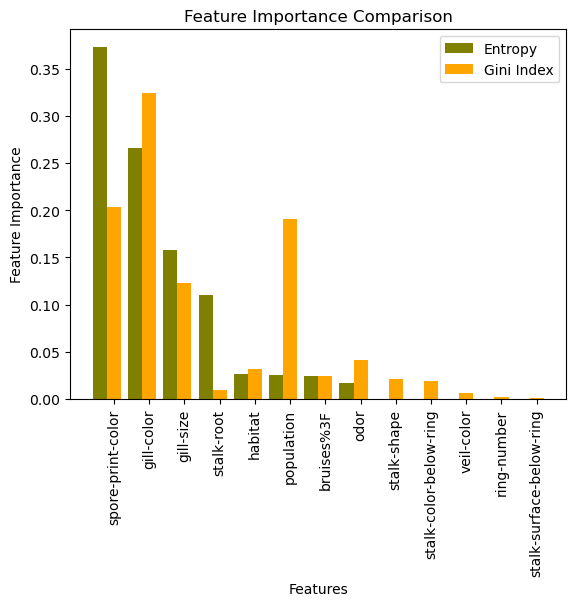

In [67]:
# specifying labels and x axis
features = f_imp['Feature']
X_axis = np.arange(len(features))

# specifying y values for each model
y1 = f_imp['Entropy Importance']
y2 = f_imp['Gini Index Importance']

# bar width
width = 0.2

# plotting bar graphs
plt.bar(X_axis - width, y1, width=0.4, label='Entropy', color='olive')
plt.bar(X_axis + width, y2, width=0.4, label='Gini Index', color='orange')

plt.xticks(X_axis + width, features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Comparison')
plt.legend()

plt.show()

#### Entropy Decision Tree

[Text(0.2857142857142857, 0.9375, 'x[8] <= -1.218\nentropy = 0.999\nsamples = 4064\nvalue = [2103, 1961]\nclass = cap-shape'),
 Text(0.21428571428571427, 0.8125, 'entropy = 0.0\nsamples = 855\nvalue = [0, 855]\nclass = cap-surface'),
 Text(0.35714285714285715, 0.8125, 'x[19] <= -0.875\nentropy = 0.929\nsamples = 3209\nvalue = [2103, 1106]\nclass = cap-shape'),
 Text(0.14285714285714285, 0.6875, 'x[10] <= -0.577\nentropy = 0.341\nsamples = 850\nvalue = [54, 796]\nclass = cap-surface'),
 Text(0.07142857142857142, 0.5625, 'entropy = 0.0\nsamples = 54\nvalue = [54, 0]\nclass = cap-shape'),
 Text(0.21428571428571427, 0.5625, 'entropy = 0.0\nsamples = 796\nvalue = [0, 796]\nclass = cap-surface'),
 Text(0.5714285714285714, 0.6875, 'x[7] <= 0.423\nentropy = 0.561\nsamples = 2359\nvalue = [2049, 310]\nclass = cap-shape'),
 Text(0.35714285714285715, 0.5625, 'x[19] <= 0.383\nentropy = 0.184\nsamples = 1999\nvalue = [1943, 56]\nclass = cap-shape'),
 Text(0.2857142857142857, 0.4375, 'entropy = 0.0\

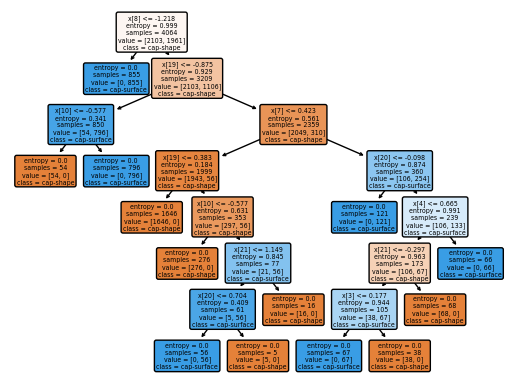

In [87]:
# creating the ENTROPY decision tree
tree.plot_tree(entropy_tree.named_steps['tree'], class_names=True)
class_names = m_columns  # specifying class labels

# print the tree
tree.plot_tree(entropy_tree.named_steps['tree'], 
               class_names=class_names,
               filled=True,
               rounded=True)

#plt.savefig('ENTROPY_TREE.pdf')

#### Gini Index Decision Tree

[Text(0.43478260869565216, 0.9375, 'x[8] <= -0.372\ngini = 0.499\nsamples = 4064\nvalue = [2103, 1961]\nclass = cap-shape'),
 Text(0.21739130434782608, 0.8125, 'x[20] <= -0.098\ngini = 0.288\nsamples = 1657\nvalue = [289, 1368]\nclass = cap-surface'),
 Text(0.08695652173913043, 0.6875, 'x[19] <= -0.875\ngini = 0.196\nsamples = 308\nvalue = [274, 34]\nclass = cap-shape'),
 Text(0.043478260869565216, 0.5625, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]\nclass = cap-surface'),
 Text(0.13043478260869565, 0.5625, 'x[21] <= -0.586\ngini = 0.092\nsamples = 288\nvalue = [274, 14]\nclass = cap-shape'),
 Text(0.08695652173913043, 0.4375, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = cap-surface'),
 Text(0.17391304347826086, 0.4375, 'gini = 0.0\nsamples = 274\nvalue = [274, 0]\nclass = cap-shape'),
 Text(0.34782608695652173, 0.6875, 'x[10] <= 0.838\ngini = 0.022\nsamples = 1349\nvalue = [15, 1334]\nclass = cap-surface'),
 Text(0.30434782608695654, 0.5625, 'x[12] <= -1.626\ngini = 0.007\nsampl

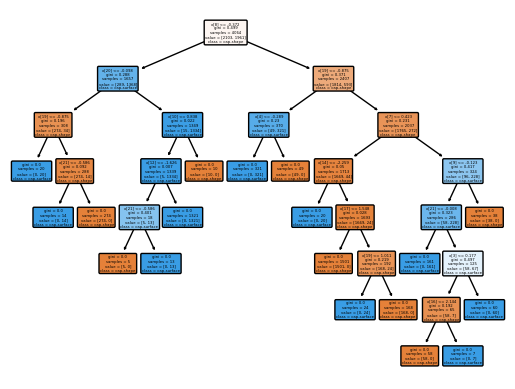

In [88]:
# creating the GINI INDEX decision tree
tree.plot_tree(gini_tree.named_steps['tree'], class_names=True)
class_names = m_columns  # specifying class labels

# print the tree
tree.plot_tree(gini_tree.named_steps['tree'], 
               class_names=class_names,
               filled=True,
               rounded=True)

#plt.savefig('GINI_TREE.pdf')

#### Other Classification Models

Logistic Regression

In [70]:
# imports
from sklearn.linear_model import LogisticRegression
# building a pipeline that will impute and standardize the data and fit a logistic regression model
logistic_regression = Pipeline([
    ('scaler', StandardScaler()),  # standardizing the data; mean==0, std==1
    ('log_reg', LogisticRegression(random_state=0))  # selecting the logistic regression model; C=1 is default
])
# fit the pipeline
logistic_regression.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=0))])

Ridge Regression (L2 Penalty)

In [71]:
# building L2 penalty pipeline
ridge_regression = Pipeline([
    ('scaler_l2', StandardScaler()),
    ('log_reg_l2', LogisticRegression(random_state=0, penalty='l2', solver='liblinear'))  # C=1 is default & optimal C value for model
])
# fit the pipeline
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('scaler_l2', StandardScaler()),
                ('log_reg_l2',
                 LogisticRegression(random_state=0, solver='liblinear'))])

Lasso Regression (L1 Penalty)

In [72]:
# building L1 penalty pipeline
lasso_regression = Pipeline([
    ('scaler_l1', StandardScaler()),
    ('log_reg_l1', LogisticRegression(random_state=0, penalty='l1', solver='liblinear'))
])
# fit the pipeline
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('scaler_l1', StandardScaler()),
                ('log_reg_l1',
                 LogisticRegression(penalty='l1', random_state=0,
                                    solver='liblinear'))])

Support Vector Machine (SVM) Model: Polynomial Kernel

In [73]:
# imports
from sklearn.svm import SVC
# building svm with polynomial kernel
poly_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('rbf', SVC(kernel='poly'))
])
# fit the pipeline
poly_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rbf', SVC(kernel='poly'))])

Support Vector Machine (SVM) Model: Radial Basis Function Kernel

In [74]:
# building svm with radial basis function kernel
rbf_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('rbf', SVC(kernel='rbf'))
])
# fit the pipeline    
rbf_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rbf', SVC())])

Naive Bayes: Bernoulli

In [75]:
# imports
from sklearn.naive_bayes import BernoulliNB
# building a bernoulli NB pipline
bernoulli = Pipeline([
    ('scaler', StandardScaler()),
    ('bernoulli', BernoulliNB())
])
# fit the pipeline
bernoulli.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('bernoulli', BernoulliNB())])

In [76]:
# imports
from sklearn.naive_bayes import GaussianNB
# building a gaussian NB pipeline
gaussian = Pipeline([
    ('scaler', StandardScaler()),
    ('GNB', GaussianNB())
])
# fit the pipeline
gaussian.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('GNB', GaussianNB())])

## Model Evaluation

In [77]:
# imports - model metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score, cross_validate

In [78]:
# cross-validation of models
logistic_regression_cv = cross_val_score(logistic_regression, X_train, y_train)
ridge_regression_cv = cross_val_score(ridge_regression, X_train, y_train)
lasso_regression_cv = cross_val_score(lasso_regression, X_train, y_train)
poly_svm_cv = cross_val_score(poly_svm, X_train, y_train)
rbf_svm_cv = cross_val_score(rbf_svm, X_train, y_train)
bernoulli_cv = cross_val_score(bernoulli, X_train, y_train)
gaussian_cv = cross_val_score(gaussian, X_train, y_train)
entropy_tree_cv = cross_val_score(entropy_tree, X_train, y_train)
gini_tree_cv = cross_val_score(gini_tree, X_train, y_train)
rfc_cv = cross_val_score(rfc, X_train, y_train)
AdaBoost_cv = cross_val_score(AdaBoost, X_train, y_train)
GradientBoost_cv = cross_val_score(GradientBoost, X_train, y_train)

In [79]:
# list of model names
model_names = ['Logistic Regression', 'Ridge Regression', 'Lasso Regression', 'SVM: Polynomial Kernel', 
               'SVM: Radial Basis Function Kernel', 'NB: Bernoulli Classification', 'NB: Gaussian Classification', 
               'Decision Tree: Entropy', 'Decision Tree: Gini Index', 'Random Forest Classifier', 'AdaBoost Boosting Classifier', 'Gradient Boost Classifier']

# list of model pipelines and steps
model = [logistic_regression, ridge_regression, lasso_regression, poly_svm, rbf_svm, bernoulli, gaussian, entropy_tree, gini_tree, rfc, AdaBoost, GradientBoost]

# list of cross-validation scores
cv_scores = [logistic_regression_cv, ridge_regression_cv, lasso_regression_cv, poly_svm_cv, rbf_svm_cv, bernoulli_cv, gaussian_cv, entropy_tree_cv, gini_tree_cv, rfc_cv, AdaBoost_cv, GradientBoost_cv]

In [80]:
# empty list for appending training accuracy scores
train_accuracy = []
test_accuracy = []

# calculating training accuracy
for m in model:
    train_acc = m.score(X_train, y_train)
    train_accuracy.append(train_acc)
    test_acc = m.score(X_train, y_train)
    test_accuracy.append(test_acc)

In [81]:
# empty list for appending cross-validation mean scores
cv_mean_scores = []

# empty list for appending cross-validation standard deviation scores
cv_std_scores = []

# calculating cross-validation mean and standard deviation scores
for scores in cv_scores:
    mean = scores.mean()
    cv_mean_scores.append(mean)
    std = scores.std()
    cv_std_scores.append(std)

In [82]:
# creating a dataframe of models and corresponding metrics
ML_models = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Cross-Validation Mean': cv_mean_scores,
    'Cross-Validation Standard Deviation': cv_std_scores
})

ML_models.sort_values(by=['Cross-Validation Mean', 'Test Accuracy', 'Train Accuracy'], ascending=False)

,Model,Train Accuracy,Test Accuracy,Cross-Validation Mean,Cross-Validation Standard Deviation
3,SVM: Polynomial Kernel,1.000000,1.000000,1.000000,0.000000
4,SVM: Radial Basis Function Kernel,1.000000,1.000000,1.000000,0.000000
7,Decision Tree: Entropy,1.000000,1.000000,1.000000,0.000000
8,Decision Tree: Gini Index,1.000000,1.000000,1.000000,0.000000
9,Random Forest Classifier,1.000000,1.000000,1.000000,0.000000
11,Gradient Boost Classifier,1.000000,1.000000,1.000000,0.000000
10,AdaBoost Boosting Classifier,0.999508,0.999508,0.999508,0.000984
2,Lasso Regression,0.963091,0.963091,0.959891,0.008332
0,Logistic Regression,0.952018,0.952018,0.949311,0.006389
1,Ridge Regression,0.952018,0.952018,0.949311,0.006389


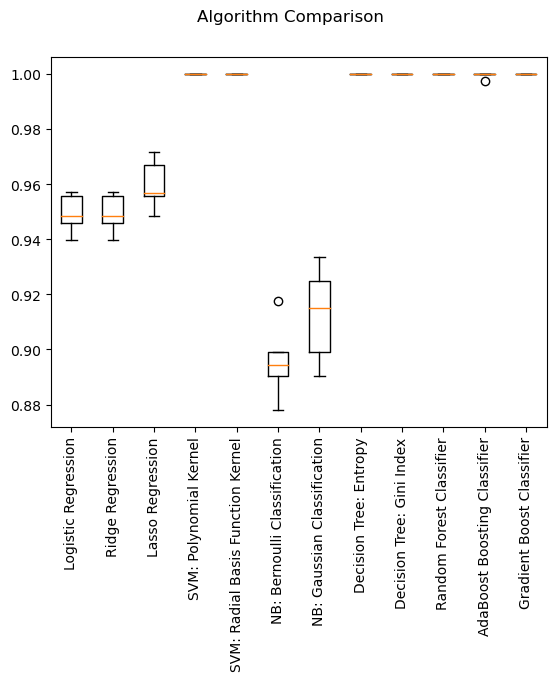

In [83]:
# plotting the model comparisons
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(cv_scores)
ax.set_xticklabels(model_names)
plt.xticks(rotation=90)
plt.show()

## Decision Tree Metrics

Precision & Recall

In [84]:
# calculating predicted y values from X_train
classes = pd.DataFrame(entropy_tree.predict(X_train))  # predicting class
probs = pd.DataFrame(entropy_tree.predict_proba(X_train))  # class probability


# calculating precision and recall
precision = precision_score(y_train, classes)  # calculating how well a classifier predicts the correct class
recall = recall_score(y_train, classes)  # calculating how well the model can correctly predict the correct class out of the actual correct class


# computing the confusion matrix
conf_matrix = confusion_matrix(y_train, classes)

ROC Curve

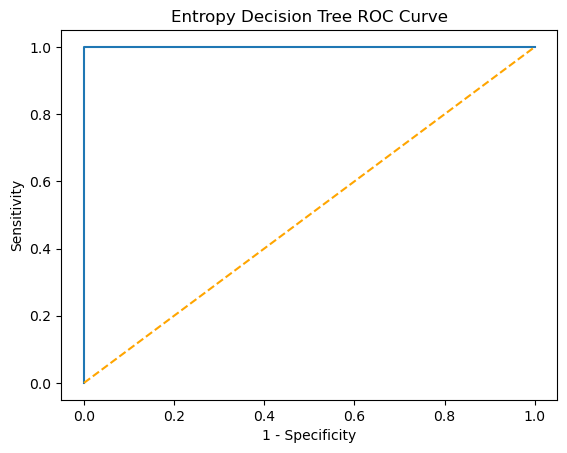

In [85]:
# generating data for the ROC curve
fpr_, tpr_, thresholds_ = roc_curve(y_train, probs[1])

# tp is the number of TRUE positives
# tpr is the true positive rate
tpr = pd.DataFrame(tpr_)
tpr.rename({0: 'tpr'}, axis=1, inplace=True)

# fp is the number of FALSE positives
# fpr is the false positive rate
fpr = pd.DataFrame(fpr_)
fpr.rename({0: 'fpr'}, axis=1, inplace=True)

# specifying thresholds
thresholds = pd.DataFrame(thresholds_)
thresholds.rename({0: 'thresholds'}, axis=1, inplace=True)

# plotting the ROC curve
roc_plot = pd.concat([fpr, tpr, thresholds], axis=1)
plt.plot('fpr', 'tpr', data=roc_plot)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Entropy Decision Tree ROC Curve')
plt.show()

In [86]:
# printing the entropy decision tree model metrics
print('The Entropy Decision Tree Precision Score is', precision)
print('The Entropy Decision Tree Recall Score is', recall)
print('The Entropy Decision Tree Area Under the ROC Curve is', 1.0)
print('The Entropy Decision Tree Confusion Matrix is', conf_matrix)

The Entropy Decision Tree Precision Score is 1.0
The Entropy Decision Tree Recall Score is 1.0
The Entropy Decision Tree Area Under the ROC Curve is 1.0
The Entropy Decision Tree Confusion Matrix is [[2103    0]
 [   0 1961]]


## Interpreting the Model Metrics

#### Training Accuracy -
The percentage of correct classifications gives us the Entropy Decision Tree model accuracy of 100% on the training and test sets.

#### Cross-Validation -
Overfitting is defined as a model's ability to make correct predictions based on the data used to develop the model, but does a poor job of making correct predictions when it encounters any new data. To prevent overfitting, cross-validation is performed. In cross-validation, the validation set is no longer needed and instead the training set is split into smaller data sets using k "folds" to indicate the number of splits desired of the training set. The model is validated using the remaining parts of the data that was not used for training. The measure of performance is calculating the average of the CV scores. The mean CV is 1.0, which indicates that the accuracy using the cross-validation procedure is 100.0%.

#### Precision & Recall Scores -
Precision, *tp / (tp + fp)*, is the ability of the classifier not to classify a negative as a positive. A low precision score (<0.5) suggests that the classifier has a high number of false positives.
Recall, *tp / (tp + fn)*, is the ability of the classifier to correctly classify all the positive samples. A low recall score (<0.5) suggests that the classifier has a high number of false negatives.
High precision and high recall scores (0.5< and <=1.0) are desirable. The precision and recall scores, both 1.0, indicates that this classification model returned no false positives or false negatives.
- tp = number of true positives
- tpr = true positive rate
- fp = number of false positives
- fpr = false positive rate
- fn = number of false negatives

#### Confusion Matrix -
The calculation of the confusion matrix identifies how many muchrooms were:
    correctly classified as edible (2103)
    *incorrectly* classified as edible (0)
    *incorrectly* classified as poisonous (0)
    correctly classified as poisonous (1961).

#### ROC Curve -
The ROC curve gives a visual representation of how well a model fits the data. Models that fit the dataset well will show a "curve" that starts vertically and sharply becomes horizontal. The ROC curve of the Entropy Decision Tree model above shows a sharp 90 degree angle that is associated with 100% accuracy.

#### AUC Score -
The AUC score is the area under the curve and calculates how efficient the model is at distinguishing between the positive and negative classes. An AUC of 1 means the classifier is 100% accurate in distinguishing between all the positive and negative class points.

## Feature Importance Comparison

The features with the greatest feature importance for entropy criterion include: 

    spore print color, gill color, gill size

The features with the greatest importance for gini index criterion include: 

    gill color, spore print color

The features with the greatest feature importance for RFC Classifier include: 

    odor, gill color, gill size

The features with the greatest feature importance for GradientBoost Classifier include:

    odor, gill color, spore print color


## Conclusion

#### Spore print color and gill color are in the top 3 largest feature importances for 3/4 tree models. Each of the tree classifier models above split at different nodes, yet all of the above models have an accuracy of 100%. The decision trees for entropy and gini index provide a visual for the different routes through the features while still coming to the same level of accuracy. With each of the models having a test accuracy of 100% as well as for the training data, it is confirmed that overfitting is not occuring. Instead, the commonality of top important features across models indicates that spore print color and gill color have the strongest predictive power in whether a mushroom is edible or poisonous in comparison to the various other features with much weaker predictive power.